# Finding Visible Turbulence

In [1]:
# generic imports because i'd rather have too many than too few
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from astropy.stats import mad_std
import numpy as np
import scipy as sp
plt.rcParams['image.origin'] = 'lower' 
from astroquery.simbad import Simbad
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
from radio_beam import Beam
from astropy.io import fits
import astropy.units as u

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [2]:
%run functions.py

In [3]:
%run get_and_plot_vizier_nir.py

In [4]:
PAAC, turbulent_stars_offset, turbulence_offset, header_offset = get_and_plot_vizier_nir(imsize=1024, fov=10*u.arcmin, wavelength=18800*u.AA)

C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


In [5]:
PAAL_pic =[]
subtract = []


for ii in range(1,11):
    countz = (10**ii)
    incorrect, PAAL, turbulence, header = get_and_plot_vizier_nir(imsize=1024, fov=10*u.arcmin, wavelength=18750*u.AA, brightness=countz)
    turbulent = PAAL - PAAC
    PAAL_pic.append(PAAL)
    subtract.append(turbulent)

C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\m

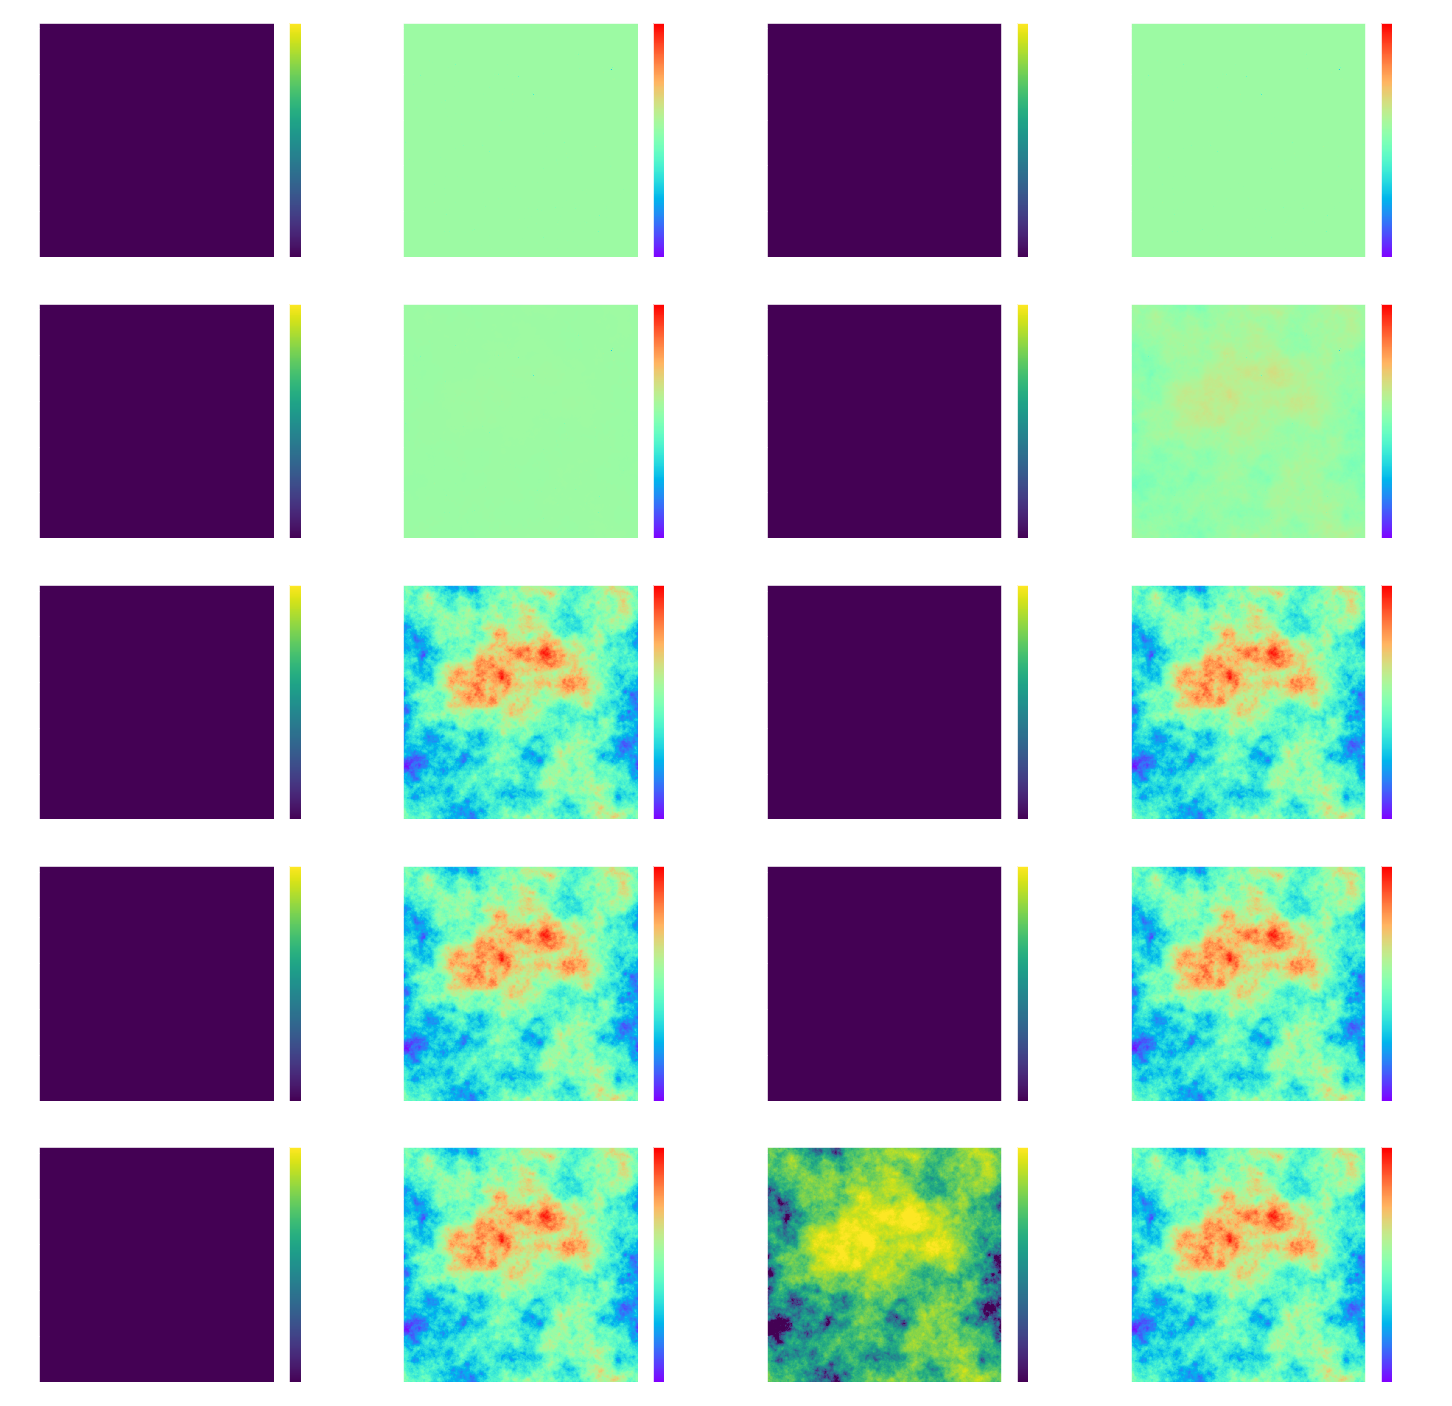

In [6]:
plt.figure(figsize=(25,25))
for ii in range(10):
    ax = plt.subplot(5,4,(ii)*2+1)
    pic = ax.imshow(PAAL_pic[ii], origin='lower', norm=visualization.simple_norm(PAAL, stretch='asinh',
                                         max_percent=99, min_percent=1))
    ax.set_title(f"PAAL with {countz} Counts Brightness")
    plt.colorbar(pic, ax=ax)
    ax = plt.subplot(5,4,(ii)*2+2)
    pix = ax.imshow(subtract[ii], origin='lower', cmap="rainbow")
    ax.set_title("Subtracted (PAAL-PAAC) Image")
    plt.colorbar(pix, ax=ax)


In [7]:
PAAL_pix =[]
subtracted = []


for ii in range(1,11):
    countz = ii*(10**4)
    incorrect, PAAL, turbulence, header = get_and_plot_vizier_nir(imsize=1024, fov=10*u.arcmin, wavelength=18750*u.AA, brightness=countz)
    turbulent = PAAL - PAAC
    PAAL_pix.append(PAAL)
    subtracted.append(turbulent)

C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\m

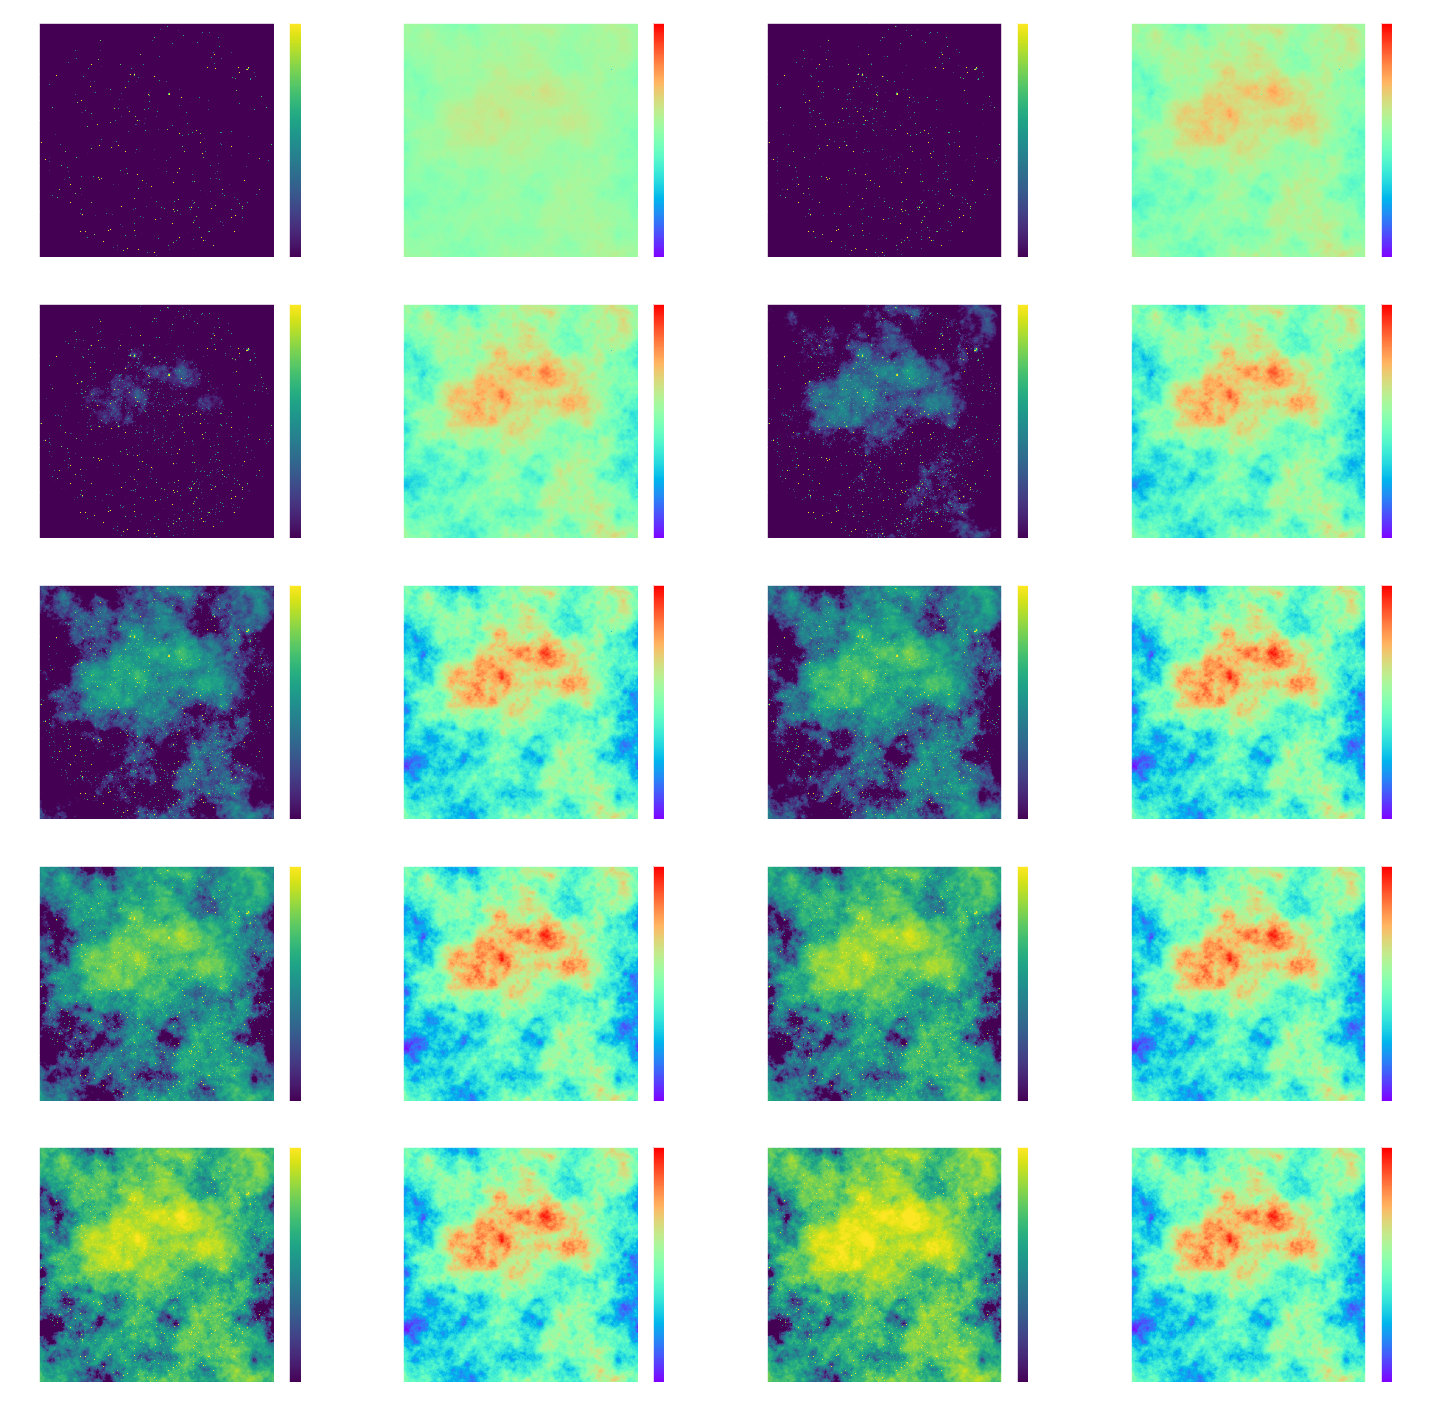

In [8]:
plt.figure(figsize=(25,25))
for ii in range(10):
    ax = plt.subplot(5,4,(ii)*2+1)
    pic = ax.imshow(PAAL_pix[ii], origin='lower', norm=visualization.simple_norm(PAAL, stretch='asinh',
                                         max_percent=99, min_percent=1))
    ax.set_title(f"PAAL with {countz} Counts Brightness")
    plt.colorbar(pic, ax=ax)
    ax = plt.subplot(5,4,(ii)*2+2)
    pix = ax.imshow(subtracted[ii], origin='lower', cmap="rainbow")
    ax.set_title("Subtracted (PAAL-PAAC) Image")
    plt.colorbar(pix, ax=ax)

# Noise Stats

In [9]:
incorrect1, PAAL, turbulence1, header1 = get_and_plot_vizier_nir(imsize=1024, fov=10*u.arcmin, wavelength=18750*u.AA, brightness=2.5*(10**2))
incorrect2, PAAC, turbulence2, header2 = get_and_plot_vizier_nir(imsize=1024, fov=10*u.arcmin, wavelength=18800*u.AA)

C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


In [10]:
poisson_noise = np.sqrt(PAAL + PAAC)
systematic_noise = mad_std(PAAL - PAAC)
total_noise = np.sqrt(poisson_noise**2 + systematic_noise**2)

In [11]:
image_sub = PAAL - PAAC
snr = np.abs(image_sub) / total_noise

C:\Users\mjfer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0, 0.5, 'Fraction of Pixels')

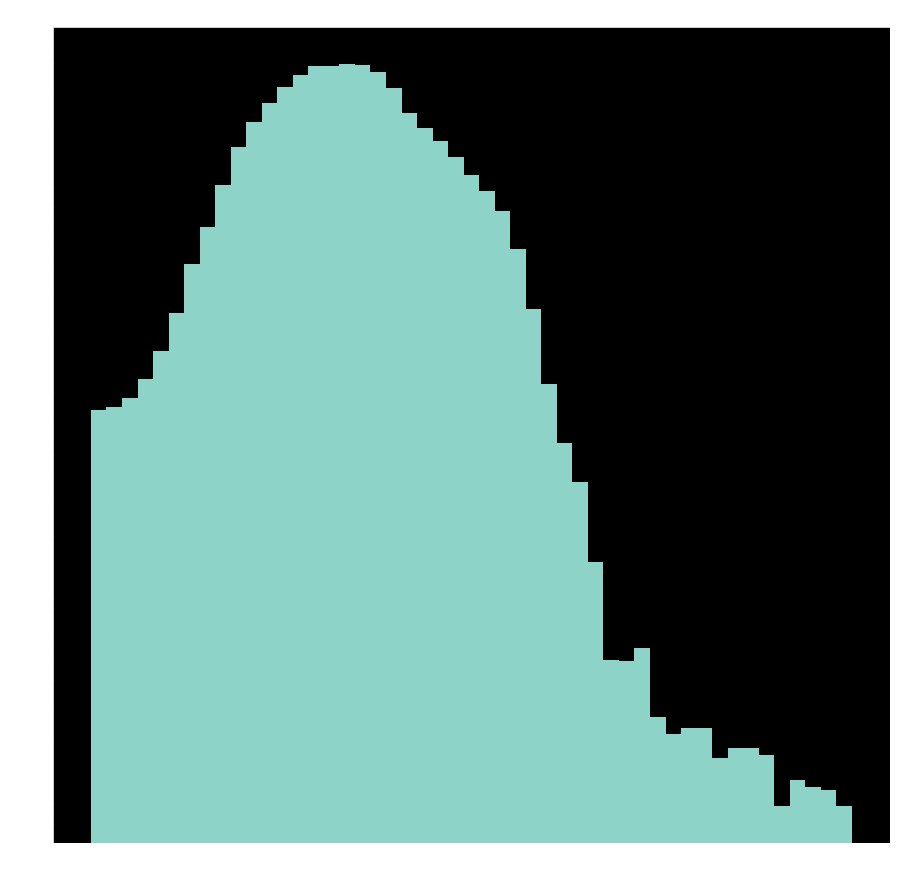

In [12]:
plt.figure(figsize=(15,15))
plt.hist(np.abs(snr).ravel(), bins=np.linspace(0,10), log=True, normed=True)
plt.title('Poisson Noise stats', fontsize='20')
plt.xlabel('Signal to Noise Ratio')
plt.ylabel('Fraction of Pixels')

In [13]:
np.count_nonzero(np.abs(snr) >= 1)/(1024**2)

0.9894227981567383

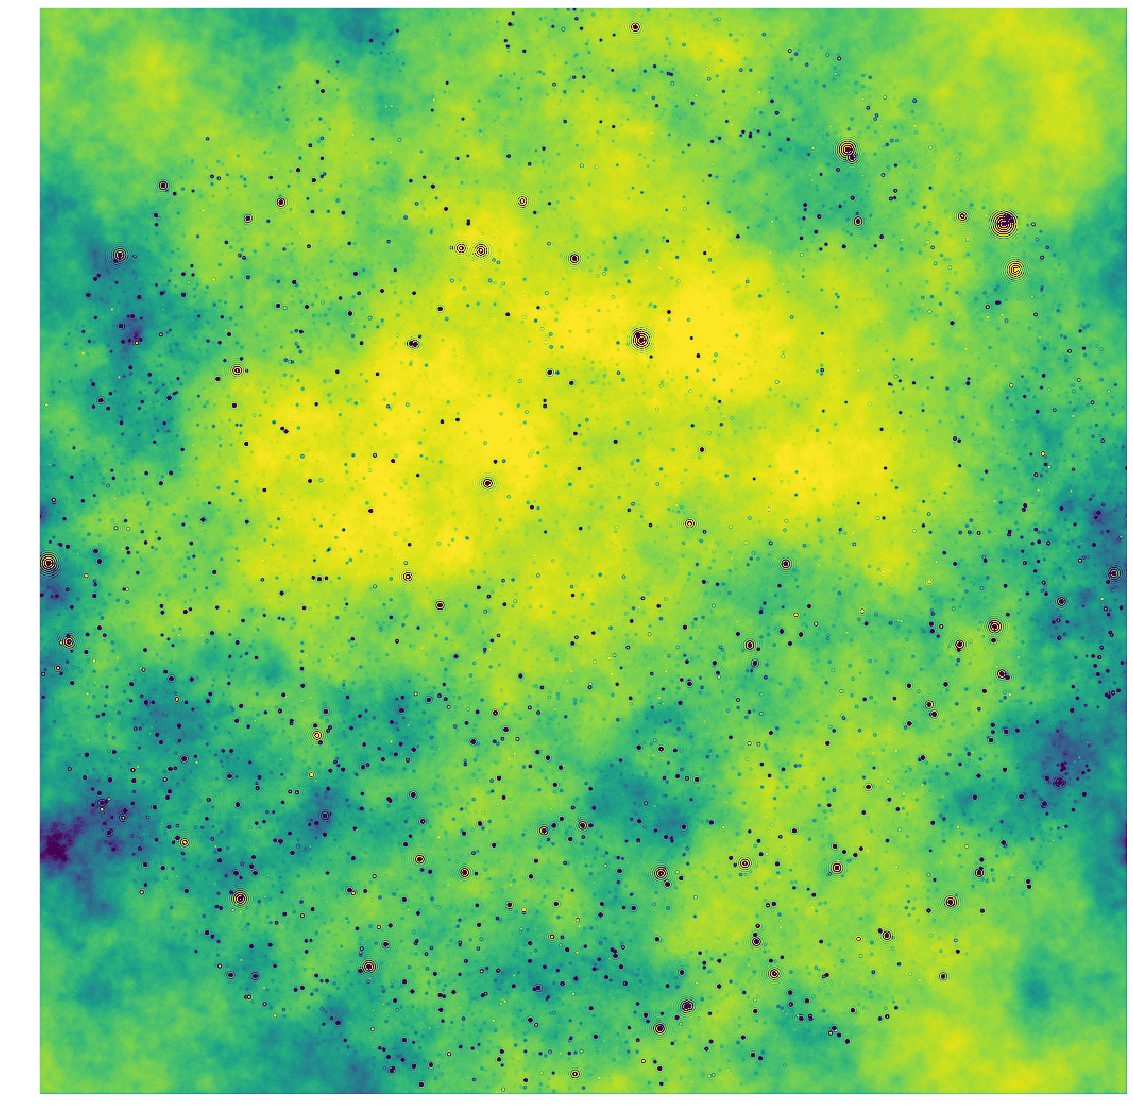

In [14]:
plt.figure(figsize=(20,20))
plt.imshow(image_sub,
          norm=visualization.simple_norm(image_sub, stretch='asinh',
                                         max_percent=99, min_percent=1))

# Bracketed Approach

In [15]:
incorrect3, lower, turbulence3, header3 = get_and_plot_vizier_nir(imsize=1024, fov=10*u.arcmin, wavelength=18700*u.AA)
incorrect4, upper, turbulence4, header4 = get_and_plot_vizier_nir(imsize=1024, fov=10*u.arcmin, wavelength=18800*u.AA)

C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
C:\Users\mjfer\Anaconda3\lib\site-packages\astropy\table\column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


In [16]:
avg_bracket = (lower + upper)/2

In [17]:
poisson_noise2 = np.sqrt(PAAL + lower + upper)
systematic_noise2 = mad_std(PAAL - avg_bracket)
total_noise2 = np.sqrt(poisson_noise2**2 + systematic_noise2**2)
image_sub2 = PAAL - avg_bracket
snr2 = np.abs(image_sub2) / total_noise2

In [18]:
np.count_nonzero(np.abs(snr2) > 1)/(1024**2)

0.997654914855957

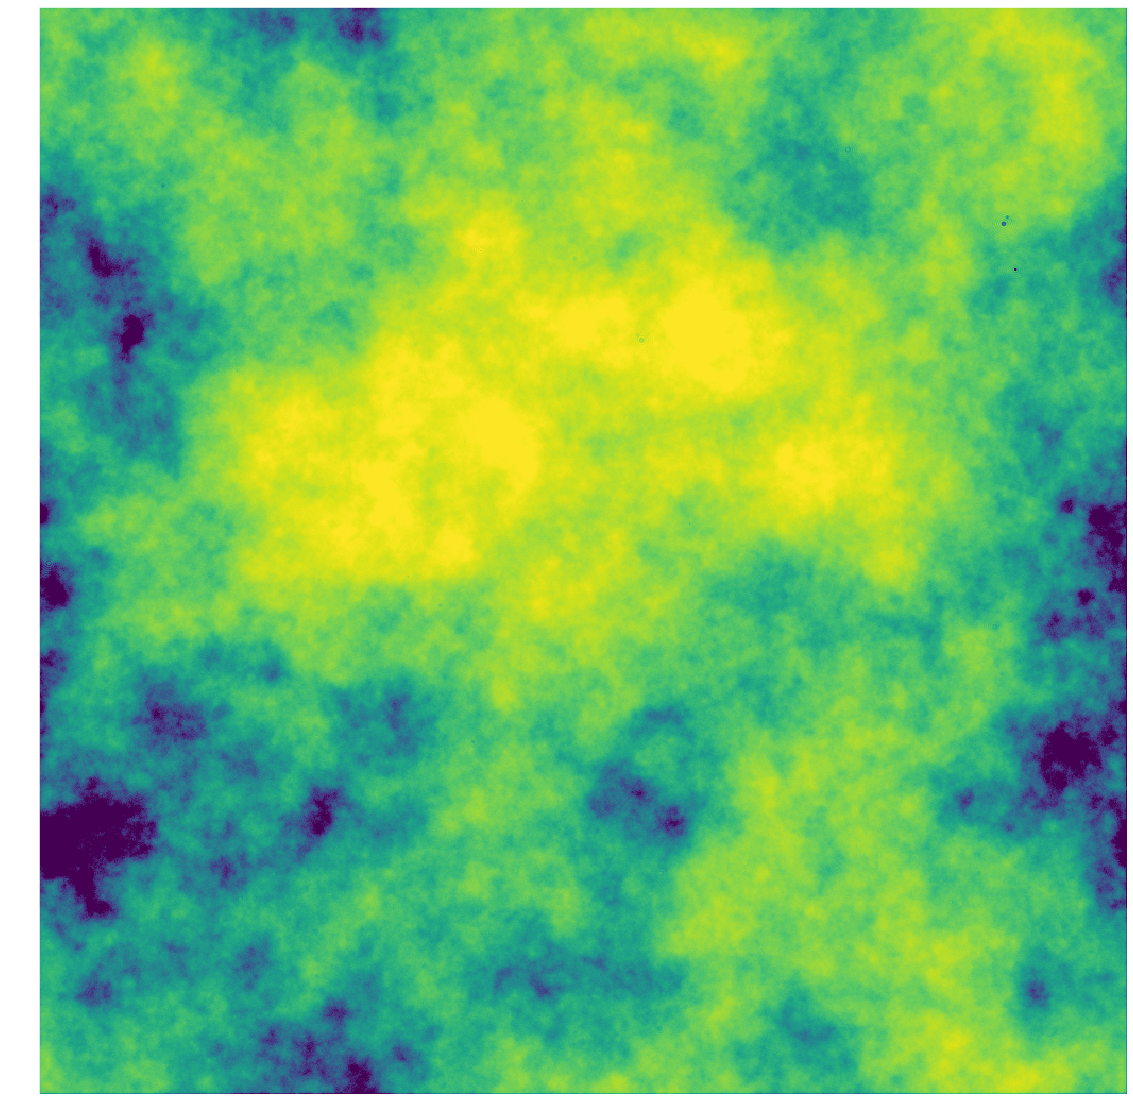

In [19]:
plt.figure(figsize=(20,20))
plt.imshow(image_sub2,
          norm=visualization.simple_norm(image_sub2, stretch='asinh',
                                         max_percent=99, min_percent=1))

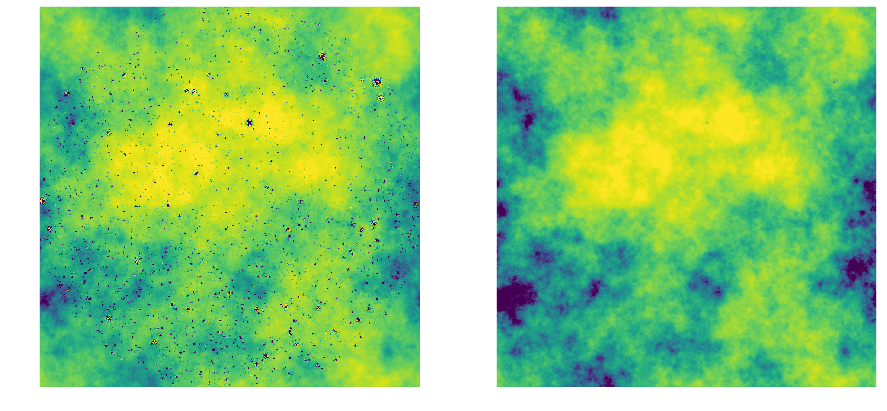

In [20]:
plt.figure(figsize=(15,15))
ax = plt.subplot(1,2,1)
ax.imshow(image_sub,norm=visualization.simple_norm(image_sub, stretch='asinh', max_percent=99, min_percent=1))
ax = plt.subplot(1,2,2)
ax.imshow(image_sub2, norm=visualization.simple_norm(image_sub2, stretch='asinh', max_percent=99, min_percent=1))